### Multilabel Classification with Python

##### Multilabel Dataset Examples


### Good, Nice App or any other positive text


![](multi-class_vs_multi_label_classification_jcharistech.png)

#### Solution for Multi-Label Problem
+ Methods for solving Multi-label Classification Problems
    + Problem Transformation
    + Adapted Algorithm
    + Ensemble approaches

#### Problem Transformation
+ It refers to transforming the multi-label problem into single-label problem(s) by using
    - Binary Relevance: treats each label as a separate single class classification
    - Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
    - Label Powerset:we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

        
#### Adapted Algorithm
+ adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.
   

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.preprocessing import StandardScaler

In [6]:
#!pip install scikit-multilearn

In [7]:
# Load Dataset
df = pd.read_csv('C:/Users/lenovo/Downloads/nextaso_interview/chrome_reviews.csv')

In [8]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [9]:
df.loc[0].Text

'This is very helpfull aap.'

In [10]:
df.dtypes

ID                  int64
Review URL         object
Text               object
Star                int64
Thumbs Up           int64
User Name          object
Developer Reply    object
Version            object
Review Date        object
App ID             object
dtype: object

In [11]:
# Convert to Float
df['Star'] = df['Star'].astype(float)

In [12]:
df.dtypes

ID                   int64
Review URL          object
Text                object
Star               float64
Thumbs Up            int64
User Name           object
Developer Reply     object
Version             object
Review Date         object
App ID              object
dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


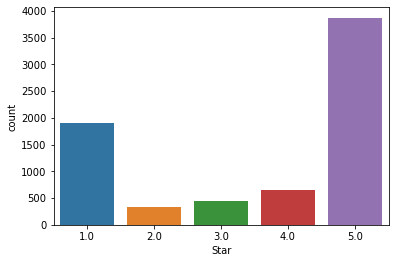

In [13]:
# Value Count 
sns.countplot(df['Star'])
plt.show()

<AxesSubplot:>

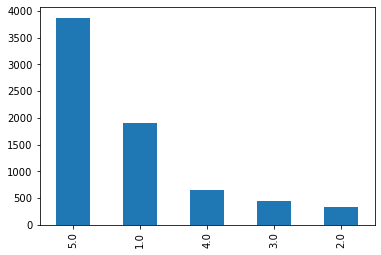

In [14]:
df['Star'].value_counts().plot(kind='bar')

### Text Preprocessing
+ neattext : remove_stopwords
+ pip install neattext

In [15]:
#pip install neattext

In [16]:
import re
import neattext as nt
import neattext.functions as nfx

In [17]:
text_en = df['Text']

In [18]:
text_en = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: Text, dtype: object

In [19]:
# Defining regex patterns.
#urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\]+'
alphaPattern      = "[^a-zA-Z0-9]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"
PROP_NAME         = '[^SYNTAX_CHAR]'
PROP_VALUE        = '[\P{C}]'

In [20]:
text_en = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: Text, dtype: object

In [21]:
text_en = text_en.apply(lambda x: x.lower())
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: Text, dtype: object

In [22]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', PROP_NAME)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: Text, dtype: object

In [23]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', PROP_VALUE)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: Text, dtype: object

In [24]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', userPattern)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: Text, dtype: object

In [25]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', sequencePattern)))
text_en.head()

0                       this is very helpfull aap
1                                            good
2    not able to update neither able to uninstall
3                                        nice app
4                               many unwanted ads
Name: Text, dtype: object

In [26]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', seqReplacePattern)))
text_en.head()

0                       this is very helpfull aap
1                                            good
2    not able to update neither able to uninstall
3                                        nice app
4                               many unwanted ads
Name: Text, dtype: object

In [27]:
data1 = pd.DataFrame(text_en, columns = ['Text'])

In [28]:
text, sentiment = list(data1['Text']), list(df['Star'])

In [29]:
datazip = []
for text, sentiment in zip(text, sentiment):
    datazip.append((text,sentiment))
        
# Convert the list into a Pandas DataFrame.
df = pd.DataFrame(datazip, columns = ['text','sentiment'])

In [30]:
df

,text,sentiment
0,this is very helpfull aap,5.0
1,good,3.0
2,not able to update neither able to uninstall,1.0
3,nice app,4.0
4,many unwanted ads,1.0
...,...,...
7199,bagusss,5.0
7200,bad version 😔,1.0
7201,one thing that i have to say i can't spelled t...,5.0
7202,excellent,5.0


In [31]:
df['text'].apply(lambda x:nt.TextFrame(x).noise_scan())

0       {'text_noise': 12.0, 'text_length': 25, 'noise...
1       {'text_noise': 0, 'text_length': 4, 'noise_cou...
2       {'text_noise': 9.090909090909092, 'text_length...
3       {'text_noise': 0, 'text_length': 8, 'noise_cou...
4       {'text_noise': 5.88235294117647, 'text_length'...
                              ...                        
7199    {'text_noise': 0, 'text_length': 7, 'noise_cou...
7200    {'text_noise': 7.6923076923076925, 'text_lengt...
7201    {'text_noise': 17.142857142857142, 'text_lengt...
7202    {'text_noise': 0, 'text_length': 9, 'noise_cou...
7203    {'text_noise': 18.681318681318682, 'text_lengt...
Name: text, Length: 7204, dtype: object

In [32]:
# Explore For Noise
df['text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                        [this, is, very]
1                                                      []
2                                  [not, to, neither, to]
3                                                      []
4                                                  [many]
                              ...                        
7199                                                   []
7200                                                   []
7201    [one, that, i, have, to, say, i, to, but, i, d...
7202                                                   []
7203    [after, it, and, always, same, to, i, to, do, ...
Name: text, Length: 7204, dtype: object

In [33]:
#dir(nfx)

In [34]:
# Explore For Noise
df['text'].apply(nfx.remove_stopwords)

0                                           helpfull aap
1                                                   good
2                             able update able uninstall
3                                               nice app
4                                           unwanted ads
                              ...                       
7199                                             bagusss
7200                                       bad version 😔
7201     thing can't spelled good problem try spell best
7202                                           excellent
7203    update lag slow goes googleee ; !!!! want work 🌚
Name: text, Length: 7204, dtype: object

In [35]:
df

,text,sentiment
0,this is very helpfull aap,5.0
1,good,3.0
2,not able to update neither able to uninstall,1.0
3,nice app,4.0
4,many unwanted ads,1.0
...,...,...
7199,bagusss,5.0
7200,bad version 😔,1.0
7201,one thing that i have to say i can't spelled t...,5.0
7202,excellent,5.0


In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
enc = OneHotEncoder(handle_unknown='ignore')

In [38]:
data2 = pd.DataFrame(enc.fit_transform(df[['sentiment']]).toarray())
data2

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
7199,0.0,0.0,0.0,0.0,1.0
7200,1.0,0.0,0.0,0.0,0.0
7201,0.0,0.0,0.0,0.0,1.0
7202,0.0,0.0,0.0,0.0,1.0


In [39]:
data2.columns = ["Risky","Terrible","Woeful","Enjoyable","Satisfied"]

In [40]:
#df = data1.replace([0,1,2,3,4], ["Risky","Terrible","Woeful","Enjoyable","Satisfied"])

In [41]:
df = pd.concat([df["text"], data2.apply(pd.Series)], axis=1)
df

,text,Risky,Terrible,Woeful,Enjoyable,Satisfied
0,this is very helpfull aap,0.0,0.0,0.0,0.0,1.0
1,good,0.0,0.0,1.0,0.0,0.0
2,not able to update neither able to uninstall,1.0,0.0,0.0,0.0,0.0
3,nice app,0.0,0.0,0.0,1.0,0.0
4,many unwanted ads,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7199,bagusss,0.0,0.0,0.0,0.0,1.0
7200,bad version 😔,1.0,0.0,0.0,0.0,0.0
7201,one thing that i have to say i can't spelled t...,0.0,0.0,0.0,0.0,1.0
7202,excellent,0.0,0.0,0.0,0.0,1.0


In [42]:
corpus = df['text'].apply(nfx.remove_stopwords)

In [43]:
corpus = np.array(df['text'])

### Feature Engineering
+ Build features from our text
+ TFIDF,countvectorizer,bow

In [44]:
tfidf = TfidfVectorizer()

In [45]:
tfidf

TfidfVectorizer()

In [46]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [47]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
#Xfeatures.apply(pd.Series)

In [49]:
df.apply(pd.Series)

,text,Risky,Terrible,Woeful,Enjoyable,Satisfied
0,this is very helpfull aap,0.0,0.0,0.0,0.0,1.0
1,good,0.0,0.0,1.0,0.0,0.0
2,not able to update neither able to uninstall,1.0,0.0,0.0,0.0,0.0
3,nice app,0.0,0.0,0.0,1.0,0.0
4,many unwanted ads,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7199,bagusss,0.0,0.0,0.0,0.0,1.0
7200,bad version 😔,1.0,0.0,0.0,0.0,0.0
7201,one thing that i have to say i can't spelled t...,0.0,0.0,0.0,0.0,1.0
7202,excellent,0.0,0.0,0.0,0.0,1.0


In [50]:
y = df.iloc[:,1:7].values
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [51]:
#Y = pd.Series([])

In [52]:
#y = df['sentiment']

In [53]:
#scaler = StandardScaler()

In [54]:
#y = scaler.fit_transform(pd.DataFrame(y))

In [55]:
#y = pd.Series(np.random.rand(5))


In [56]:
print(Xfeatures.shape)
print(y.shape)

(7204, 5413)
(7204, 5)


In [57]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [58]:
print(df['text'].shape)
print(X_train.shape)

(7204,)
(5042, 5413)


In [59]:
# Building Our Model
# Estimator + Multilabel Estimator

In [60]:
### Problem Transform
import skmultilearn

In [61]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

### Binary Relevance classficiation
+ Convert Our Multi-Label Prob to Multi-Class

![](binary_relevance_multilabel_ml_jcharistech.png)

In [62]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [63]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [64]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [65]:
br_prediction

<2162x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1705 stored elements in Compressed Sparse Column format>

In [66]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [67]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.593432007400555

In [68]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.11887141535615171

#### Classifier Chains
+ Preserve Label Correlation

![](classifier_chains_multilabel_jcharistech.png)

In [69]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [70]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [71]:
clf_chain_model

{'accuracy:': 0.622109158186864, 'hamming_score': 0.11692876965772434}

#### LabelPowerset
![](labelPowerset_multilabel_ml_jcharistech.png)

In [72]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [73]:
clf_labelP_model

{'accuracy:': 0.7183163737280296, 'hamming_score': 0.11267345050878816}

In [74]:
### Apply On A Simple Ttitle/Question

In [75]:
ex1 = df['text'].iloc[0]
ex1

'this is very helpfull aap'

In [76]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [77]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[0., 0., 0., 0., 1.]])

In [78]:
import pickle
import joblib

In [79]:
file = open('binary_rel_clf.pickle','wb')
pickle.dump(binary_rel_clf, file)
file.close()

In [80]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the binary_rel_clf.
    file = open('C:\\Users\\lenovo\\Downloads\\nextaso_interview\\binary_rel_clf.pickle', 'rb')
    binary_rel_clf = pickle.load(file)
    file.close()
       
    return binary_rel_clf



In [81]:
# Save Model
binary_rel_clf_file = open("binary_rel_clf_model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [82]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    Test = pd.DataFrame(["I hate twitter",
                         "Good",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good",
           "Not able to update. Neither able to uninstall.",
           "Many unwanted ads",
           'Awesome',
           "My phone is samsung s9 and I can't update the app",
            "Very good app i like this for every uses",
            "Nice app"])
    Test.columns=["text"]
    ex2 = Test['text'].iloc[2]
    vec_example = tfidf.transform([ex2])
    
    final = binary_rel_clf.predict(vec_example).toarray()
    print(final)

[[0. 0. 0. 0. 0.]]


In [83]:
text_en

0                               this is very helpfull aap
1                                                    good
2            not able to update neither able to uninstall
3                                                nice app
4                                       many unwanted ads
                              ...                        
7199                                              bagusss
7200                                        bad version 😔
7201    one thing that i have to say i can't spelled t...
7202                                            excellent
7203    after update it lag and always slow same goes ...
Name: Text, Length: 7204, dtype: object

In [84]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    Test = pd.DataFrame(text_en)
    Test.columns=["text"]
    ex2 = Test['text'].iloc[7]
    vec_example = tfidf.transform([ex2])
    
    final = binary_rel_clf.predict(vec_example).toarray()
    print(final)

[[0. 0. 0. 0. 1.]]


In [85]:
finaldata = pd.DataFrame(final)
finaldata

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
